# TSentiment Data Histograms

Summary of this
- made some histograms for the Twitter sentiment data. A big problem with the data are the massive amounts of values that are between  -0.05 and 0.05. This is caused by the VADER Library scoring certain sentences as neutral despite their political content. To solve this, I also created histograms that exclude values in the -0.05 and 0.05 range.  

r'D:/Final Project Econ/
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Correlation_Matrix-Party_Pres_Vice.jpg',dpi=400,bbox_inches="tight")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Correlation_Matrix-Party_Pres_Vice.pdf',dpi=400,bbox_inches="tight")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
T_polls=pd.read_csv(r'D:/Final Project Econ/trump polling data.csv')
T_polls['end_date']=pd.to_datetime(T_polls['end_date'])
T_polls.set_index('answer',inplace=True)

B_polls=pd.read_csv(r'D:/Final Project Econ/biden polling data.csv')
B_polls['end_date']=pd.to_datetime(B_polls['end_date'])
B_polls.set_index('answer',inplace=True)

T_tweets=pd.read_csv(r'D:/Final Project Econ/trump sentiment and tweets.csv')
T_tweets['created_at']=pd.to_datetime(T_tweets['created_at'])
T_tweets.set_index('created_at',inplace=True)

B_tweets=pd.read_csv(r'D:/Final Project Econ/biden sentiment and tweets.csv')
B_tweets['created_at']=pd.to_datetime(B_tweets['created_at'])
B_tweets.set_index('created_at',inplace=True)


In [3]:
T_tweets=pd.read_csv(r'D:/Final Project Econ/trump sentiment and tweets.csv')
T_tweets['created_at']=pd.to_datetime(T_tweets['created_at'])
T_tweets.set_index('created_at',inplace=True)
T_tweets['compound'].value_counts()
t_hist=T_tweets['compound'].copy()
t_hist.sort_values(inplace=True)
t_hist=t_hist.round(decimals=2)
t_hist_abs=abs(t_hist)

B_tweets['compound'].value_counts()
b_hist=B_tweets['compound'].copy()
b_hist.sort_values(inplace=True)
b_hist=b_hist.round(decimals=2)
b_hist_abs=abs(b_hist)


In [4]:
import seaborn as sns
sns.set_theme()

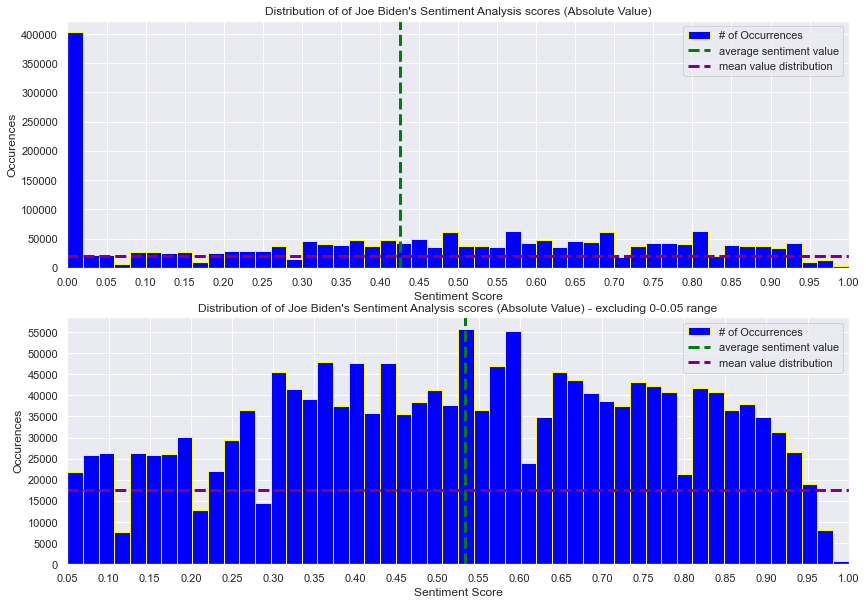

In [7]:
fig, ax=plt.subplots(2,1,figsize=(14,10))

ax[0].set_title("Distribution of of Joe Biden's Sentiment Analysis scores (Absolute Value)")
ax[1].set_title("Distribution of of Joe Biden's Sentiment Analysis scores (Absolute Value) - excluding 0-0.05 range")


ax[0].hist(b_hist_abs.to_list(),bins=50,edgecolor='yellow',color='blue'
        ,label="# of Occurrences")
ax[0].set_xlim(0.0, 1) #right
ax[0].set_xticks(np.linspace(0,1,21))
ax[0].axvline(x=b_hist_abs.mean(),color="green", label='average sentiment value',linestyle='--',linewidth=3 )
ax[0].axhline(y=b_hist_abs.value_counts().mean(),color="purple", label='mean value distribution',linestyle='--',linewidth=3 )

#for i in range(0,420000,50000):
#    ax[0].axhline(i,linestyle='--',color='black',alpha=.3)

ax[0].set_yticks(list(range(0,420000,50000)))
ax[0].set_xlabel("Sentiment Score")
ax[0].set_ylabel("Occurences")


ax[1].hist((b_hist_abs[b_hist_abs>=.05]).to_list(),bins=50,edgecolor='yellow',color='blue'
        ,label="# of Occurrences")
ax[1].set_xlim(0.05, 1) #right
ax[1].set_xticks(np.linspace(0.05,1,20))
ax[1].axvline(x=(b_hist_abs[b_hist_abs>=.05]).mean(),color="green", label='average sentiment value',linestyle='--',linewidth=3 )
ax[1].axhline(y=(b_hist_abs[b_hist_abs>=.05]).value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--',linewidth=3 )

ax[1].set_yticks(list(range(0,60000,5000)))
ax[1].set_xlabel("Sentiment Score")
ax[1].set_ylabel("Occurences")


#for i in range(0,60000,5000):
#    ax[1].axhline(i,linestyle='--',color='black',alpha=.3)



ax[0].legend()
ax[1].legend()


plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_sentiment_histograms.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_sentiment_histograms-Party_Pres_Vice.pdf',dpi=400,bbox_inches="tight")


plt.show()




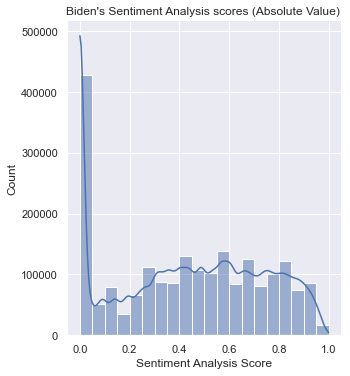

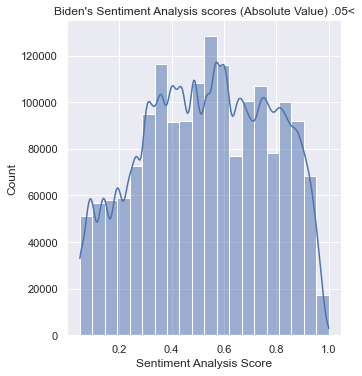

In [8]:

g=sns.displot(data=b_hist_abs.array,kde=True,bins=20).set(title="Biden's Sentiment Analysis scores (Absolute Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
#g.map(sns.displot(data=b_hist_abs_array,kde=True,bins=20)) 
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=b_hist_abs[b_hist_abs>=.05].array,kde=True,bins=20).set(title="Biden's Sentiment Analysis scores (Absolute Value) .05<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
#g.map(sns.displot(data=b_hist_abs_array,kde=True,bins=20)) 
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()

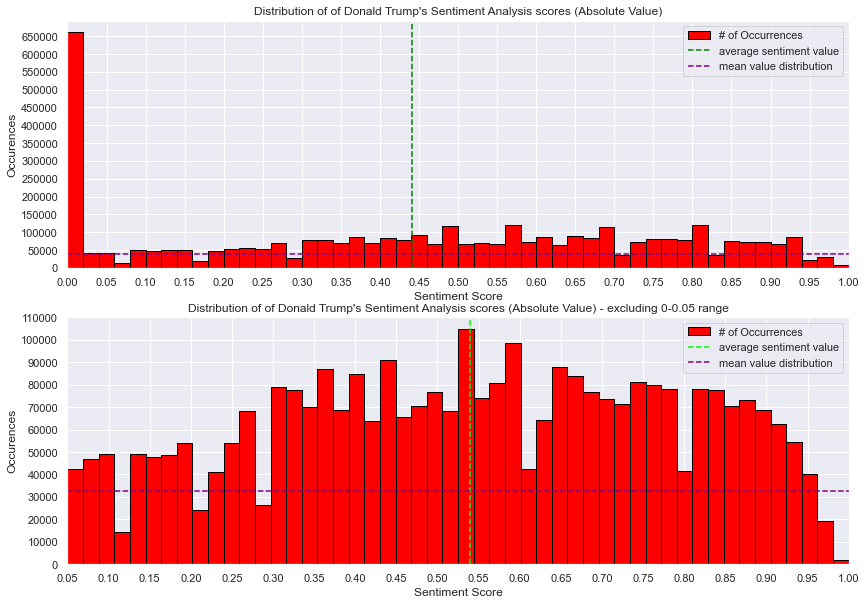

In [9]:


fig, ax=plt.subplots(2,1,figsize=(14,10))

ax[0].set_yticks(list(range(0,700000,50000)))
ax[0].set_xlabel("Sentiment Score")
ax[0].set_ylabel("Occurences")

#for i in list(range(0,700000,50000)):
#    ax[0].axhline(i,linestyle='--',color='black',alpha=.2)




ax[0].set_title("Distribution of of Donald Trump's Sentiment Analysis scores (Absolute Value)")
ax[1].set_title("Distribution of of Donald Trump's Sentiment Analysis scores (Absolute Value) - excluding 0-0.05 range")

ax[0].hist(t_hist_abs.to_list(),bins=50,edgecolor='black',color='red',label="# of Occurrences")
ax[0].set_xlim(0, 1) #right

ax[0].set_xticks(np.linspace(0,1,21))
ax[0].axvline(x=t_hist_abs.mean(),color="green", label='average sentiment value',linestyle='--' )
ax[0].axhline(y=t_hist_abs.value_counts().mean(),color="purple", label='mean value distribution',linestyle='--' )



ax[1].hist((t_hist_abs[t_hist_abs>=.05]).to_list(),bins=50,edgecolor='black',color='red'
        ,label="# of Occurrences")
ax[1].set_xlim(0.05, 1) #right
ax[1].set_xticks(np.linspace(0.05,1,20))
ax[1].axvline(x=(t_hist_abs[t_hist_abs>=.05]).mean(),color="lime", label='average sentiment value',linestyle='--' )
ax[1].axhline(y=(t_hist_abs[t_hist_abs>=.05]).value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--' )

ax[0].legend()

ax[1].legend()

ax[1].set_yticks(list(range(0,120000,10000)))
ax[1].set_xlabel("Sentiment Score")
ax[1].set_ylabel("Occurences")

#for i in list(range(0,120000,10000)):
#    ax[1].axhline(i,linestyle='--',color='black',alpha=.2)


plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_sentiment_histograms.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_sentiment_histograms-Party_Pres_Vice.pdf',dpi=400,bbox_inches="tight")

plt.show()




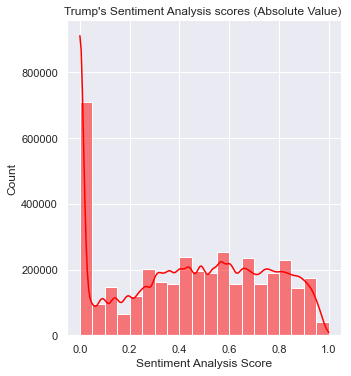

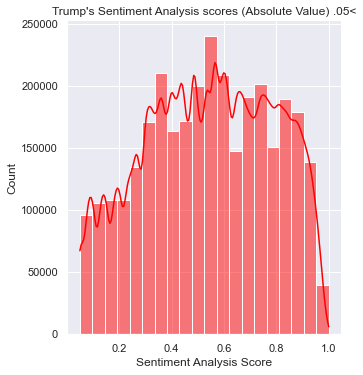

In [10]:

g=sns.displot(data=t_hist_abs.array,kde=True,bins=20,color='red').set(title="Trump's Sentiment Analysis scores (Absolute Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
#g.map(sns.displot(data=b_hist_abs_array,kde=True,bins=20)) 
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=t_hist_abs[t_hist_abs>=.05].array,kde=True,bins=20,color='red').set(title="Trump's Sentiment Analysis scores (Absolute Value) .05<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
#g.map(sns.displot(data=b_hist_abs_array,kde=True,bins=20)) 
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()

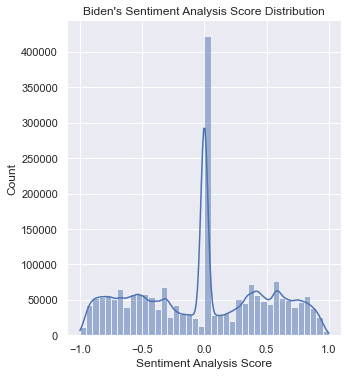

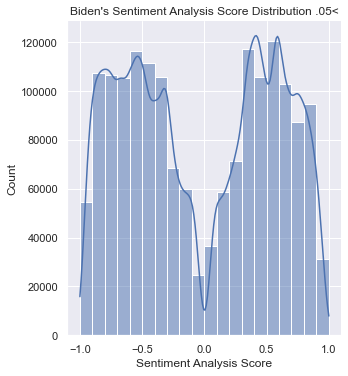

In [11]:

g=sns.displot(data=b_hist.array,kde=True,bins=40).set(title="Biden's Sentiment Analysis Score Distribution")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=b_hist[b_hist_abs>=.05].array,kde=True,bins=20).set(title="Biden's Sentiment Analysis Score Distribution .05<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Biden_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()

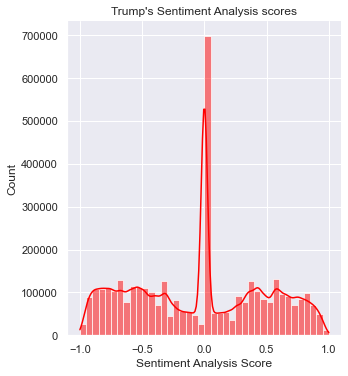

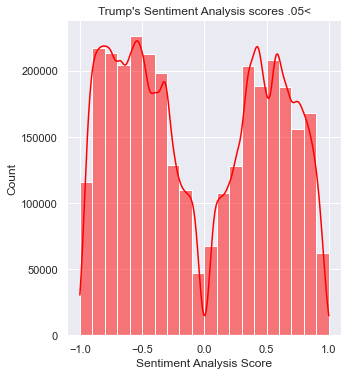

In [12]:

g=sns.displot(data=t_hist.array,kde=True,bins=40,color='red').set(title="Trump's Sentiment Analysis scores")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=t_hist[t_hist_abs>=.05].array,kde=True,bins=20,color='red').set(title="Trump's Sentiment Analysis scores .05<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Trump_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()

In [13]:
#twitter_data_and_sentiment

tweets=pd.read_csv(r'D:/Final Project Econ/twitter_data_and_sentiment.csv')
tweets['created_at']=pd.to_datetime(tweets['created_at'])
tweets.set_index('created_at',inplace=True)
tweets['compound'].value_counts()
tweet_hist=tweets['compound'].copy()
tweet_hist.sort_values(inplace=True)
tweet_hist=tweet_hist.round(decimals=2)
tweet_hist_abs=abs(tweet_hist)


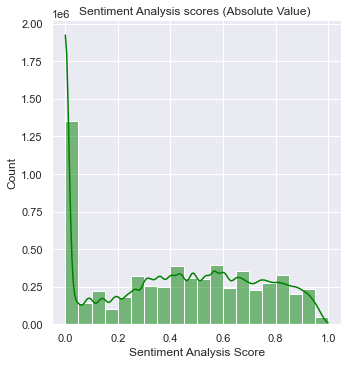

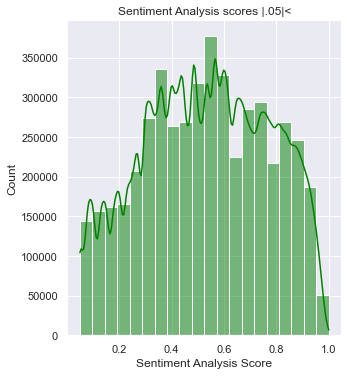

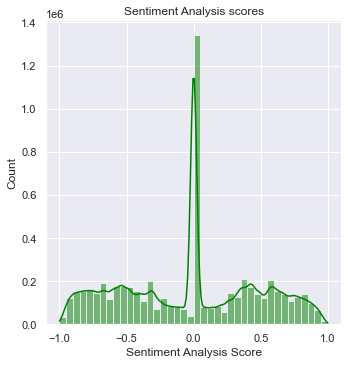

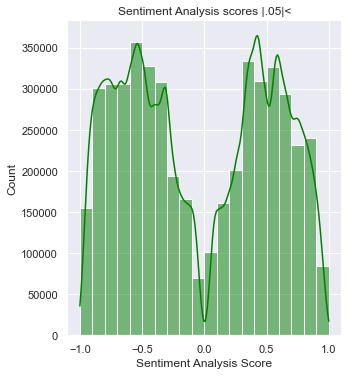

In [14]:

g=sns.displot(data=tweet_hist_abs.array,kde=True,bins=20,color='green').set(title="Sentiment Analysis scores (Absolute Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=tweet_hist_abs[tweet_hist_abs>=.05].array,kde=True,bins=20,color='green').set(title="Sentiment Analysis scores |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=tweet_hist.array,kde=True,bins=40,color='green').set(title="Sentiment Analysis scores")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=tweet_hist[tweet_hist_abs>=.05].array,kde=True,bins=20,color='green').set(title="Sentiment Analysis scores |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Tweet_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()

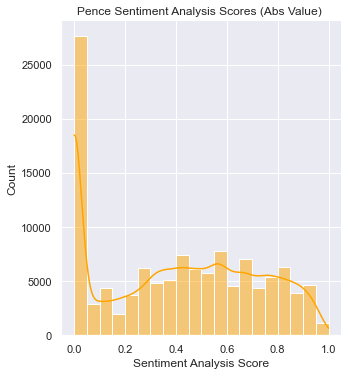

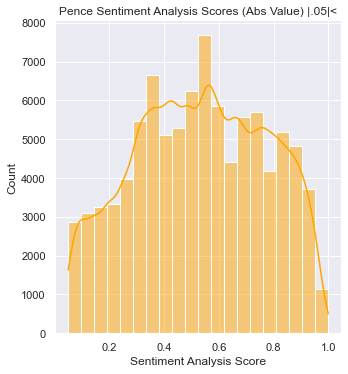

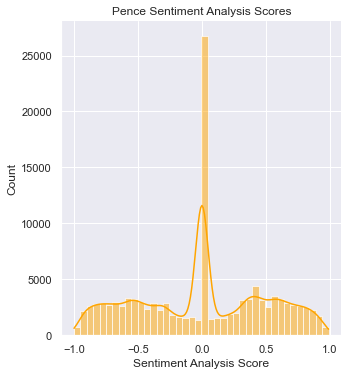

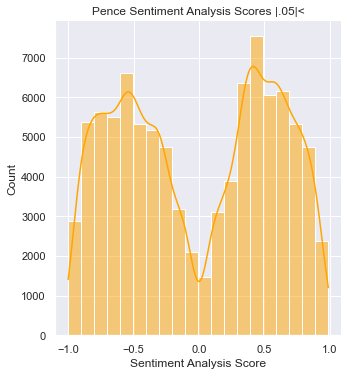

In [15]:
#pence

pence_tweets=pd.read_csv(r'D:/Final Project Econ/pence sentiment and tweets.csv')
pence_tweets['created_at']=pd.to_datetime(pence_tweets['created_at'])
pence_tweets.set_index('created_at',inplace=True)
pence_tweets['compound'].value_counts()
pence_tweet_hist=pence_tweets['compound'].copy()
pence_tweet_hist.sort_values(inplace=True)
pence_tweet_hist=pence_tweet_hist.round(decimals=2)
pence_tweet_hist_abs=abs(pence_tweet_hist)

g=sns.displot(data=pence_tweet_hist_abs.array,kde=True,bins=20,color='orange').set(title="Pence Sentiment Analysis Scores (Abs Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=pence_tweet_hist_abs[pence_tweet_hist_abs>=.05].array,kde=True,bins=20,color='orange').set(title="Pence Sentiment Analysis Scores (Abs Value) |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=pence_tweet_hist.array,kde=True,bins=40,color='orange').set(title="Pence Sentiment Analysis Scores")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=pence_tweet_hist[pence_tweet_hist_abs>=.05].array,kde=True,bins=20,color='orange').set(title="Pence Sentiment Analysis Scores |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\Pence_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


del pence_tweet_hist
del pence_tweet_hist_abs

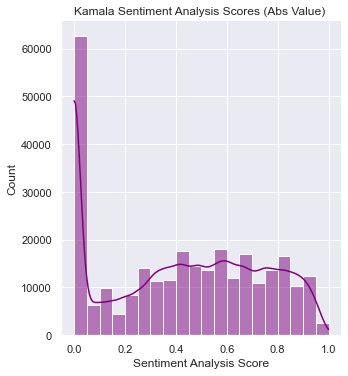

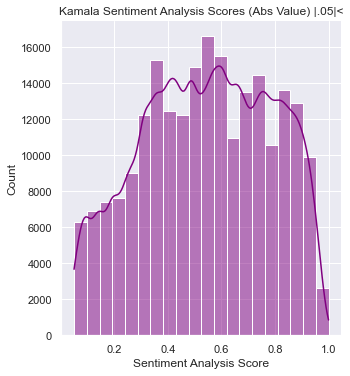

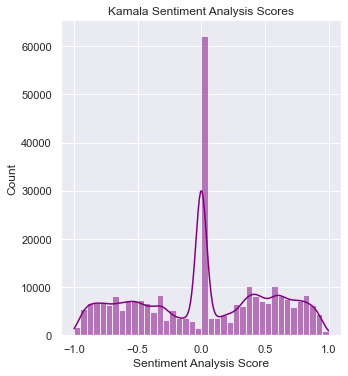

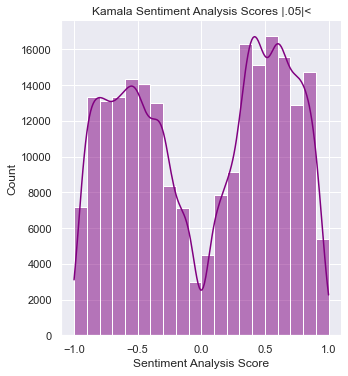

In [16]:
#kamala

kamala_tweets=pd.read_csv(r'D:/Final Project Econ/kamala sentiment and tweets.csv')
kamala_tweets['created_at']=pd.to_datetime(kamala_tweets['created_at'])
kamala_tweets.set_index('created_at',inplace=True)
kamala_tweets['compound'].value_counts()
kamala_tweet_hist=kamala_tweets['compound'].copy()
kamala_tweet_hist.sort_values(inplace=True)
kamala_tweet_hist=kamala_tweet_hist.round(decimals=2)
kamala_tweet_hist_abs=abs(kamala_tweet_hist)

g=sns.displot(data=kamala_tweet_hist_abs.array,kde=True,bins=20,color='purple').set(title="Kamala Sentiment Analysis Scores (Abs Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=kamala_tweet_hist_abs[kamala_tweet_hist_abs>=.05].array,kde=True,bins=20,color='purple').set(title="Kamala Sentiment Analysis Scores (Abs Value) |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=kamala_tweet_hist.array,kde=True,bins=40,color='purple').set(title="Kamala Sentiment Analysis Scores")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=kamala_tweet_hist[kamala_tweet_hist_abs>=.05].array,kde=True,bins=20,color='purple').set(title="Kamala Sentiment Analysis Scores |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\kamala_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


del kamala_tweet_hist
del kamala_tweet_hist_abs

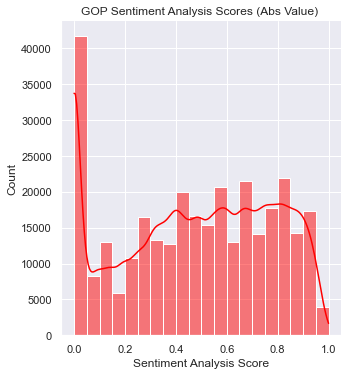

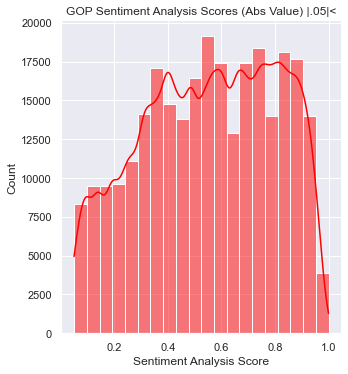

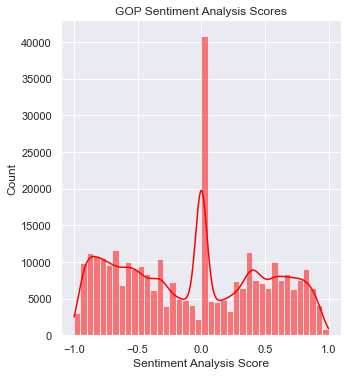

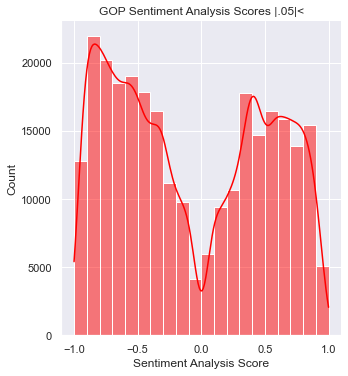

In [17]:
#gop

gop_tweets=pd.read_csv(r'D:/Final Project Econ/gop sentiment and tweets.csv')
gop_tweets['created_at']=pd.to_datetime(gop_tweets['created_at'])
gop_tweets.set_index('created_at',inplace=True)
gop_tweets['compound'].value_counts()
gop_tweet_hist=gop_tweets['compound'].copy()
gop_tweet_hist.sort_values(inplace=True)
gop_tweet_hist=gop_tweet_hist.round(decimals=2)
gop_tweet_hist_abs=abs(gop_tweet_hist)

g=sns.displot(data=gop_tweet_hist_abs.array,kde=True,bins=20,color='red').set(title="GOP Sentiment Analysis Scores (Abs Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=gop_tweet_hist_abs[gop_tweet_hist_abs>=.05].array,kde=True,bins=20,color='red').set(title="GOP Sentiment Analysis Scores (Abs Value) |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=gop_tweet_hist.array,kde=True,bins=40,color='red').set(title="GOP Sentiment Analysis Scores")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=gop_tweet_hist[gop_tweet_hist_abs>=.05].array,kde=True,bins=20,color='red').set(title="GOP Sentiment Analysis Scores |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\gop_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


del gop_tweet_hist
del gop_tweet_hist_abs

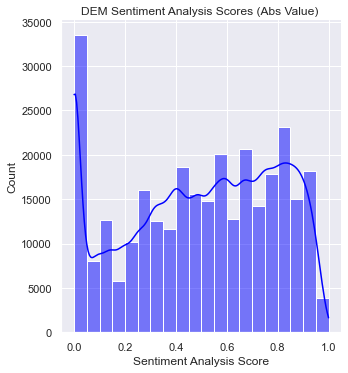

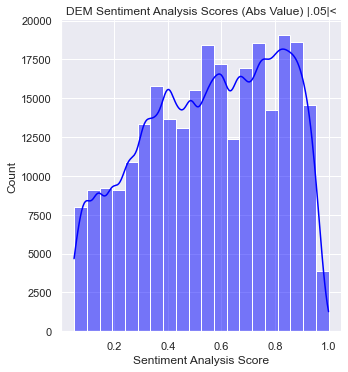

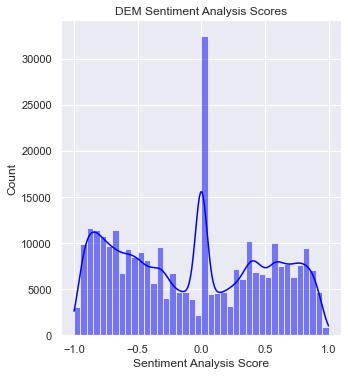

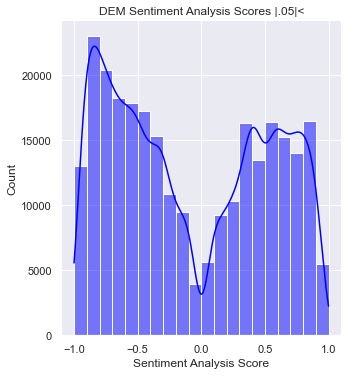

In [18]:
#dem

dem_tweets=pd.read_csv(r'D:/Final Project Econ/dem sentiment and tweets.csv')
dem_tweets['created_at']=pd.to_datetime(dem_tweets['created_at'])
dem_tweets.set_index('created_at',inplace=True)
dem_tweets['compound'].value_counts()
dem_tweet_hist=dem_tweets['compound'].copy()
dem_tweet_hist.sort_values(inplace=True)
dem_tweet_hist=dem_tweet_hist.round(decimals=2)
dem_tweet_hist_abs=abs(dem_tweet_hist)

g=sns.displot(data=dem_tweet_hist_abs.array,kde=True,bins=20,color='blue').set(title="DEM Sentiment Analysis Scores (Abs Value) ")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_ABS_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_ABS_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()

g=sns.displot(data=dem_tweet_hist_abs[dem_tweet_hist_abs>=.05].array,kde=True,bins=20,color='blue').set(title="DEM Sentiment Analysis Scores (Abs Value) |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_ABS_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_ABS_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=dem_tweet_hist.array,kde=True,bins=40,color='blue').set(title="DEM Sentiment Analysis Scores")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_KDE_Hist.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_KDE_Hist.pdf',dpi=400,bbox_inches="tight")
plt.show()


g=sns.displot(data=dem_tweet_hist[dem_tweet_hist_abs>=.05].array,kde=True,bins=20,color='blue').set(title="DEM Sentiment Analysis Scores |.05|<")
g.set_axis_labels("Sentiment Analysis Score", "Count")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_KDE_Hist_no_zero.jpg',dpi=400,bbox_inches="tight")
#plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\dem_KDE_Hist_no_zero.pdf',dpi=400,bbox_inches="tight")
plt.show()


del dem_tweet_hist
del dem_tweet_hist_abs

In [ ]:

f, (ax, ax2) =plt.subplots(1,2,figsize=(14,10),sharey=True)
ax.set_title("Histogram Distribution of Biden's Sentiment Analysis Values")



ax.hist((b_hist[b_hist<=-.05]).to_list(),bins=25,edgecolor='yellow',color='blue')
ax2.hist((b_hist[b_hist>=.05]).to_list(),bins=25,edgecolor='yellow',color='blue'
        ,label="# of Occurrences")


ax.set_xlim(-1,-.05)  #left
ax2.set_xlim(0.05, 1) #right


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.set_xticks([-1,-.8,-.6,-.4,-.2,])
ax.set_yticks([0,10000,20000,30000,40000,50000,])
ax2.set_yticks([0,10000,20000,30000,40000,50000])
ax2.set_xticks([1,.8,.6,.4,.2,])
ax.axhline(y=(b_hist[(b_hist>.05)|(b_hist<-.05)]).value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--' )
ax2.axhline(y=(b_hist[(b_hist>.05)|(b_hist<-.05)]).value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--' )

#check if the above values are accurate

ax.text(-.12,-2000,s="-0.05",fontsize=10)
ax.text(-.04,-2000,s="0.05",fontsize=10)
f.subplots_adjust(wspace = 0.05)


ax2.legend(loc='upper right')
plt.show()




In [ ]:
f, (ax, ax2) =plt.subplots(1,2,figsize=(14,10),sharey=True)
ax.set_title("Histogram Distribution of Trump's Sentiment Analysis Values")

ax.hist((t_hist[t_hist<=-.05]).to_list(),bins=25,edgecolor='green',color='red')
ax2.hist((t_hist[t_hist>=.05]).to_list(),bins=25,edgecolor='green',color='red'
        ,label="# of Occurrences")


ax.set_xlim(-1,-.05)  #left
ax2.set_xlim(0.05, 1) #right


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.set_xticks([-1,-.8,-.6,-.4,-.2,])
ax2.set_xticks([1,.8,.6,.4,.2,])
ax.set_yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])
ax2.set_yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])

ax.text(-.12,-3500,s="-0.05",fontsize=10)
ax.text(-.04,-3500,s="0.05",fontsize=10)
f.subplots_adjust(wspace = 0.05)
ax.axhline(y=(t_hist[(t_hist>.05)|(t_hist<-.05)]).value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--' )
ax2.axhline(y=(t_hist[(t_hist>.05)|(t_hist<-.05)]).value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--' )

### check if the above are actually accurate.

ax2.legend(loc='upper right')
plt.show()




In [ ]:
fig, ax = plt.subplots()

ax.hist((b_hist).to_list(),bins=25,edgecolor='yellow',color='blue')
ax.axvline(x=b_hist.mean(),color="purple", label='average sentiment value',linestyle='--' )
ax.axhline(y=b_hist.value_counts().mean(),color="black", label='mean value distribution ',linestyle='--' )
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.hist((t_hist).to_list(),bins=25,edgecolor='yellow',color='red')
ax.axvline(x=t_hist.mean(),color="green", label='average sentiment value',linestyle='--' )
ax.axhline(y=t_hist.value_counts().mean(),color="purple", label='mean value distribution ',linestyle='--' )
plt.show()

### Further Work:
- trying to make histograms for each candidate on each day. Maybe we make an animation of some sort idk https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py


- below is code to create a df with a collection of daily sentiment values. This splits up all compound values by day for one candidate. Do something with this idk

In [ ]:
df=B_tweets['compound'].copy()
unique_dates=list(set(df.index.to_list()))
unique_dates.sort()
df=df.round(decimals=2)
values_list=list(set(df.to_list()))
values_list.sort()

# this is the unique times the values show up
d2=pd.DataFrame()
i=0
while i<len(unique_dates):
    temp=df[unique_dates[i]].reset_index()
    temp=temp.iloc[:,1]
    d2=pd.concat([d2,temp],axis=1)
    i=i+1
d2.columns=[unique_dates[:i]]   
d2

In [ ]:

f, (ax, ax2) =plt.subplots(1,2,figsize=(14,10),sharey=True)
ax.set_title("Distribution of Biden's Sentiment Analysis Values on 9-04")



ax.hist((d2.iloc[:,1][d2.iloc[:,3]<=-.05]).to_list(),bins=25,edgecolor='yellow',color='blue')
ax2.hist((d2.iloc[:,1][d2.iloc[:,3]>=.05]).to_list(),bins=25,edgecolor='yellow',color='blue'
        ,label="# of Occurrences")


ax.set_xlim(-1,-.05)  #left
ax2.set_xlim(0.05, 1) #right


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.set_xticks([-1,-.8,-.6,-.4,-.2,])
#ax.set_yticks([0,10000,20000,30000,40000,50000,])
#ax2.set_yticks([0,10000,20000,30000,40000,50000])
ax2.set_xticks([1,.8,.6,.4,.2,])



ax.text(-.12,-30,s="-0.05",fontsize=10)
ax.text(-.04,-30,s="0.05",fontsize=10)
f.subplots_adjust(wspace = 0.05)


ax2.legend(loc='upper right')
plt.show()




In [ ]:

f, (ax, ax2) =plt.subplots(1,2,figsize=(14,10),sharey=True)
ax.set_title("Distribution of Biden's Sentiment Analysis Values on 9-03")



ax.hist((d2.iloc[:,1][d2.iloc[:,2]<=-.05]).to_list(),bins=25,edgecolor='yellow',color='blue')
ax2.hist((d2.iloc[:,1][d2.iloc[:,2]>=.05]).to_list(),bins=25,edgecolor='yellow',color='blue'
        ,label="# of Occurrences")


ax.set_xlim(-1,-.05)  #left
ax2.set_xlim(0.05, 1) #right


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.set_xticks([-1,-.8,-.6,-.4,-.2,])
#ax.set_yticks([0,10000,20000,30000,40000,50000,])
#ax2.set_yticks([0,10000,20000,30000,40000,50000])
ax2.set_xticks([1,.8,.6,.4,.2,])



ax.text(-.12,-30,s="-0.05",fontsize=10)
ax.text(-.04,-30,s="0.05",fontsize=10)
f.subplots_adjust(wspace = 0.05)


ax2.legend(loc='upper right')
plt.show()


